##VISUALIZING THE DATA

In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
bishop = cv2.imread("E:/loopr/train/bishop_resized/00000000_resized.jpg")
bishop = cv2.cvtColor(bishop,cv2.COLOR_BGR2RGB)

In [3]:
type(bishop)

numpy.ndarray

In [4]:
bishop.shape

(224, 224, 3)

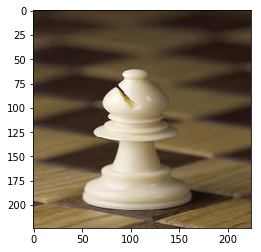

In [5]:
plt.imshow(bishop)

In [6]:
knight = cv2.imread("E:/loopr/train/knight-resize/00000001_resized.jpg")
knight = cv2.cvtColor(knight,cv2.COLOR_BGR2RGB)

In [7]:
type(knight)

numpy.ndarray

In [8]:
knight.shape

(224, 224, 3)

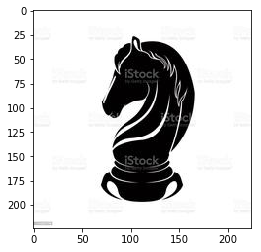

In [9]:
plt.imshow(knight)

In [10]:
pawn = cv2.imread("E:/loopr/train/pawn_resized/00000001_resized.jpg")
pawn = cv2.cvtColor(pawn,cv2.COLOR_BGR2RGB)

In [11]:
type(pawn)

numpy.ndarray

In [12]:
pawn.shape

(224, 224, 3)

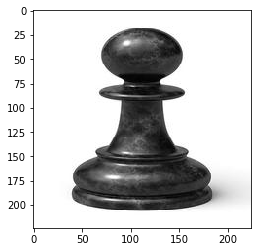

In [13]:
plt.imshow(pawn)

In [14]:
queen = cv2.imread("E:/loopr/train/Queen-Resized/00000000_resized.jpg")
queen = cv2.cvtColor(queen,cv2.COLOR_BGR2RGB)

In [15]:
type(queen)

numpy.ndarray

In [16]:
queen.shape

(224, 224, 3)

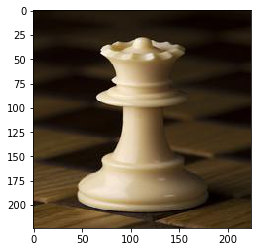

In [17]:
plt.imshow(queen)

In [18]:
rook = cv2.imread("E:/loopr/train/Rook-resize/00000001_resized.jpg")
rook = cv2.cvtColor(rook,cv2.COLOR_BGR2RGB)

In [19]:
type(rook)

numpy.ndarray

In [20]:
rook.shape

(224, 224, 3)

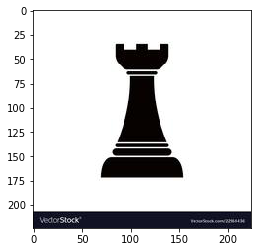

In [21]:
plt.imshow(rook)

##PREPARING THE MODEL

In [22]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [23]:
image_gen = ImageDataGenerator(
                               rescale=1/255,
                               zoom_range=0.2,
                               horizontal_flip=True, 
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [24]:
image_gen.flow_from_directory("E:/loopr/train/")

Found 516 images belonging to 5 classes.


In [25]:
image_gen.flow_from_directory("E:/loopr/test/")

Found 135 images belonging to 5 classes.


In [26]:
image_shape = (150,150,3)

#CREATING THE MODEL

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten , MaxPooling2D,Activation, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer,As we have 5 classes(bishop ,queen,pawn,rook,knight)
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

##TRAINING THE MODEL

In [30]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("E:/loopr/train/",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 516 images belonging to 5 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory("E:/loopr/test/",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 135 images belonging to 5 classes.


In [32]:
train_image_gen.class_indices

{'Queen-Resized': 0,
 'Rook-resize': 1,
 'bishop_resized': 2,
 'knight-resize': 3,
 'pawn_resized': 4}

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
results = model.fit_generator(train_image_gen,epochs=10,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/10
150/150 [==============================] - 78s 523ms/step - loss: 1.6327 - acc: 0.2950 - val_loss: 1.5287 - val_acc: 0.3704
Epoch 2/10
150/150 [==============================] - 77s 511ms/step - loss: 1.2171 - acc: 0.5312 - val_loss: 1.5274 - val_acc: 0.4815
Epoch 3/10
150/150 [==============================] - 108s 721ms/step - loss: 0.9006 - acc: 0.6621 - val_loss: 1.5133 - val_acc: 0.4815
Epoch 4/10
150/150 [==============================] - 109s 725ms/step - loss: 0.7107 - acc: 0.7520 - val_loss: 1.8080 - val_acc: 0.4815
Epoch 5/10
150/150 [==============================] - 103s 686ms/step - loss: 0.5792 - acc: 0.8117 - val_loss: 1.7066 - val_acc: 0.5111
Epoch 6/10
150/150 [==============================] - 104s 691ms/step - loss: 0.4676 - acc: 0.8425 - val_loss: 2.0782 - val_acc: 0.5481
Epoch 7/10
150/150 [==============================] - 103s 688ms/step - loss: 0.4112 - acc: 0.8659 - val_loss: 2.0690 - val_acc: 0.5111
Epoch 8/10
150/150 [==============================

##EVALUATING THE MODEL

In [35]:
results.history['acc']

[0.29615384615384616,
 0.5293367346938775,
 0.6649572649572649,
 0.7470238095238095,
 0.8106837606837607,
 0.8431122448979592,
 0.8688034188034188,
 0.8945578231292517,
 0.9055555555555556,
 0.9132478632478632]

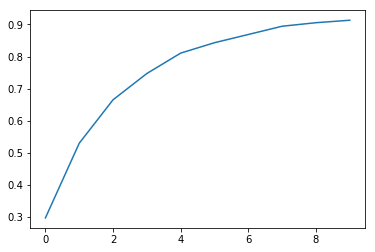

In [36]:
plt.plot(results.history['acc'])

In [37]:
#model.save('chess_10epochs.h5')

In [38]:
train_image_gen.class_indices

{'Queen-Resized': 0,
 'Rook-resize': 1,
 'bishop_resized': 2,
 'knight-resize': 3,
 'pawn_resized': 4}

##PREDICITON ON NEW IMAGES

In [60]:
import numpy as np
from keras.preprocessing import image

bishop_file = "E:/loopr/test/bishop_resized/00000198_resized.jpg"

bishop_img = image.load_img(bishop_file, target_size=(150, 150))

bishop_img = image.img_to_array(bishop_img)

bishop_img = np.expand_dims(bishop_img, axis=0)
bishop_img = bishop_img/255

In [61]:
prediction_prob = model.predict_classes(bishop_img)

In [89]:
print(prediction_prob)
if prediction_prob[0]==0:
    print("Queen")
elif prediction_prob[0]==1:
    print("Rook")
elif prediction_prob[0]==2:
    print("Bishop")
elif prediction_prob[0]==3:
    print("knight")
else:
    print("pawn")

[2]
Bishop
